In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import defmod.multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.registrationdata as regdata
import defmod.hamiltonian_multishape as hamiltonian
from defmod.energyfunctional import EnergyFunctional_unconstrained, EnergyFunctional
from defmod import optimize
import defmod.save_results as results

torch.set_default_tensor_type(torch.DoubleTensor)

In [2]:
data = regdata.Nut()
data()
source = data.source
target = data.target
module_list = data.modules
reduce_background = False

In [3]:
h = dm.hamiltonian.Hamiltonian(data.modules)
def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[0].manifold.gd.view(-1,2) for i in range(len(target))], target)
E = EnergyFunctional_unconstrained(h.module, h, source, target, dim=2, gamma=0.01, attach=attach)

In [4]:
gd0_tensor = torch.cat(h.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(h.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

from defmod import optimize
X[1] = optimize.BFGS(E, X, disp=True)(maxiter=100)

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ = torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), self.__coeff * K_q)


cost: 0.0 attach: 12.933211334882209
cost: 0.0 attach: 12.933211334882209
cost: 0.24900347460449757 attach: 38.94263983725417
cost: 0.24900347460449757 attach: 38.94263983725417
cost: 0.010819681636822627 attach: 7.5651484830741555
cost: 0.010819681636822627 attach: 7.5651484830741555
cost: 0.03979559835638363 attach: 11.128050249986968
cost: 0.03979559835638363 attach: 11.128050249986968
cost: 0.016335075072527624 attach: 5.1824880526805135
cost: 0.016335075072527624 attach: 5.1824880526805135
cost: 0.03510033266096536 attach: 9.583661888871129
cost: 0.03510033266096536 attach: 9.583661888871129
cost: 0.018289900565270453 attach: 4.496574611348973
cost: 0.018289900565270453 attach: 4.496574611348973
cost: 0.025301737641973458 attach: 9.046931283473933
cost: 0.025301737641973458 attach: 9.046931283473933
cost: 0.018614552358737636 attach: 4.424462058891501
cost: 0.018614552358737636 attach: 4.424462058891501
cost: 0.01864769982231432 attach: 4.281281782477566
cost: 0.01864769982231432 

Optimization terminated successfully.
         Current function value: 0.021040
         Iterations: 64
         Function evaluations: 74
         Gradient evaluations: 74


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ = torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), self.__coeff * K_q)


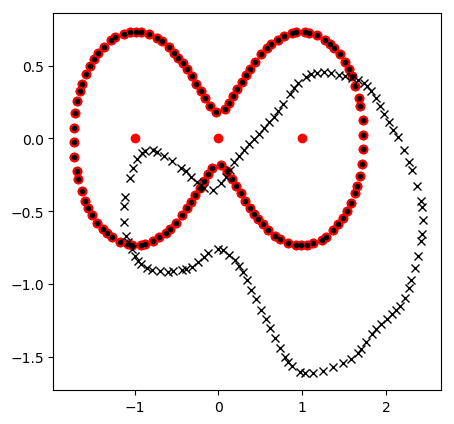

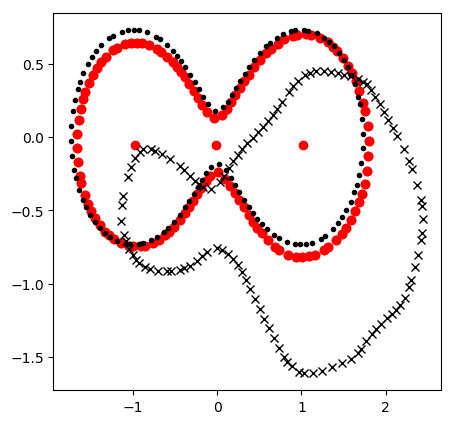

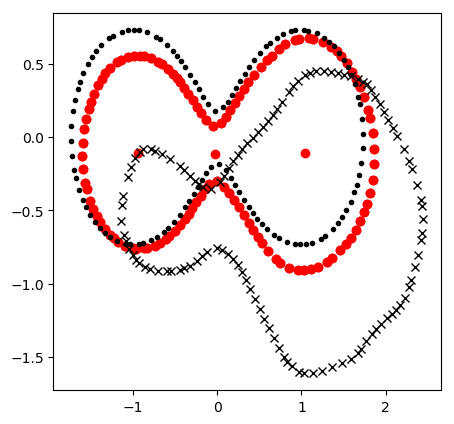

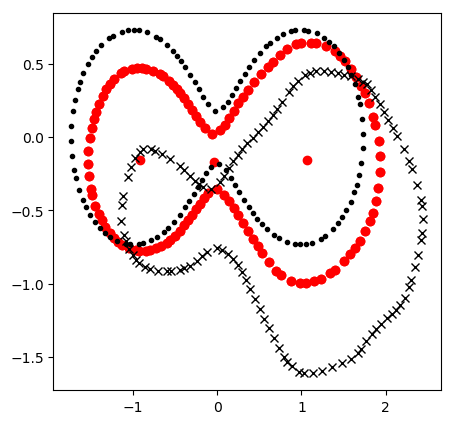

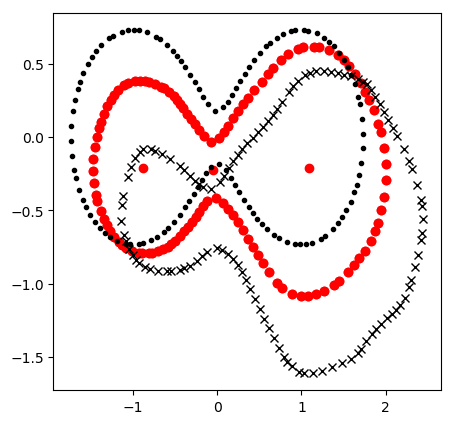

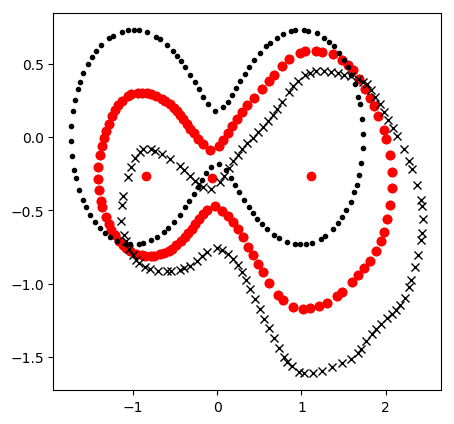

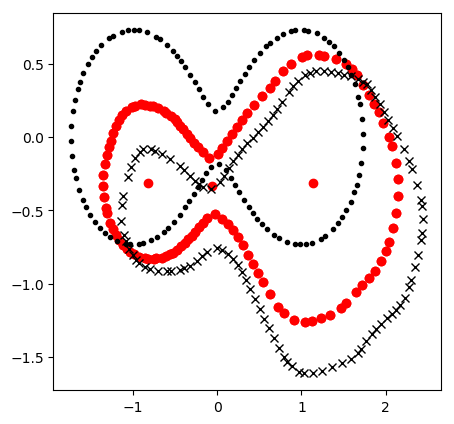

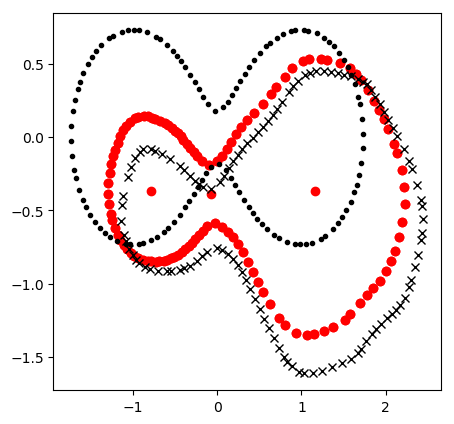

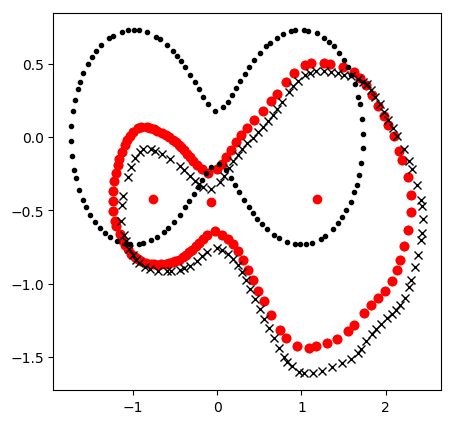

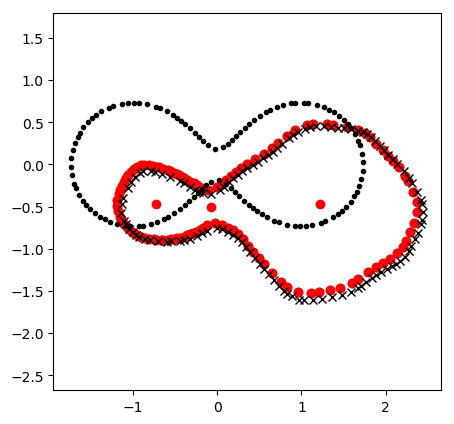

[<Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>]

In [15]:

h.module.manifold.fill_gd(X[0])
h.module.manifold.fill_cotan(X[1])
save = results.Save_Results_SingleShape(h, source, target)

save.fig_states(show=True)

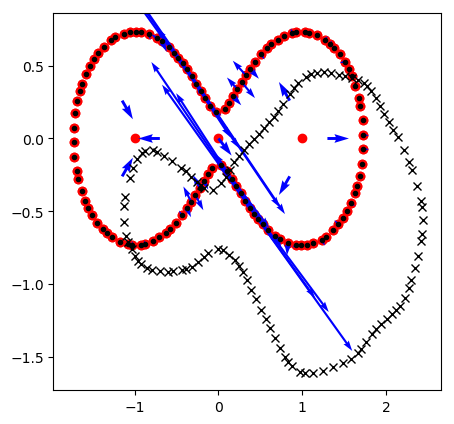

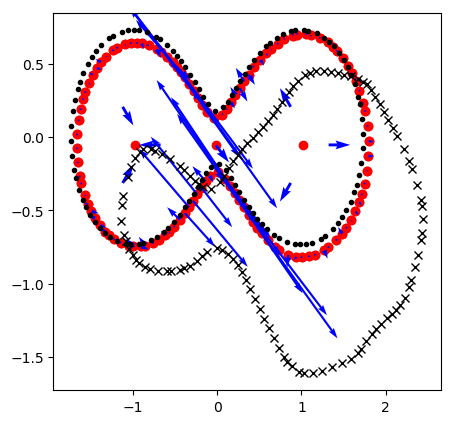

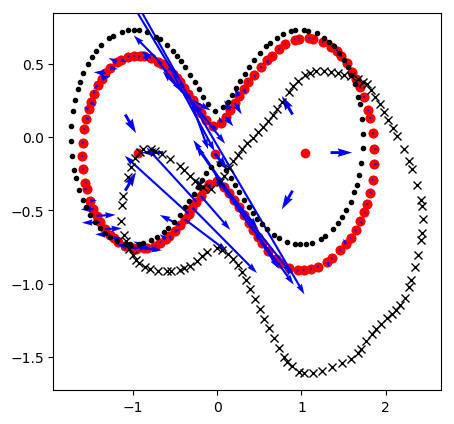

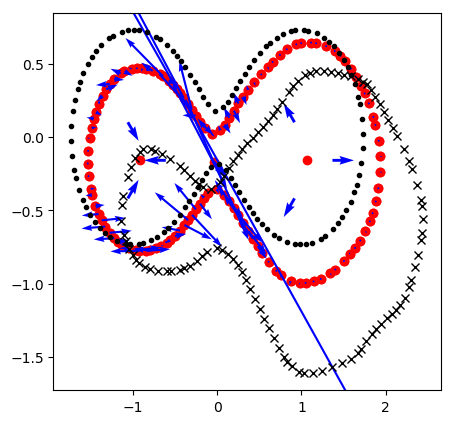

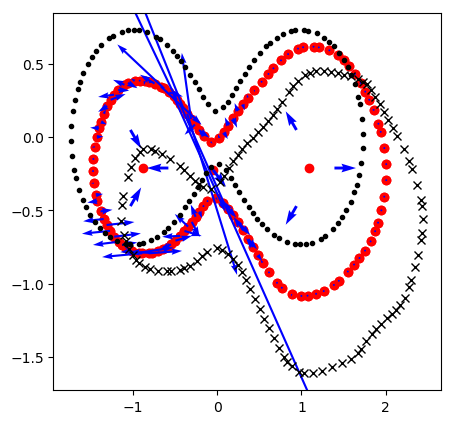

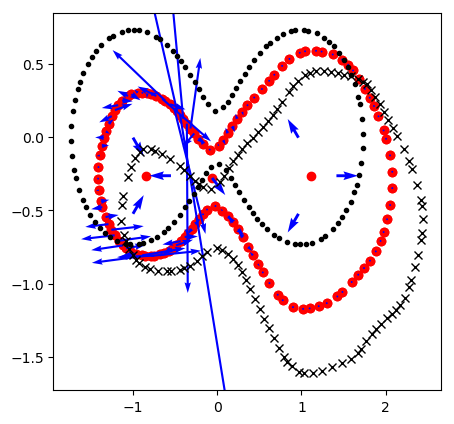

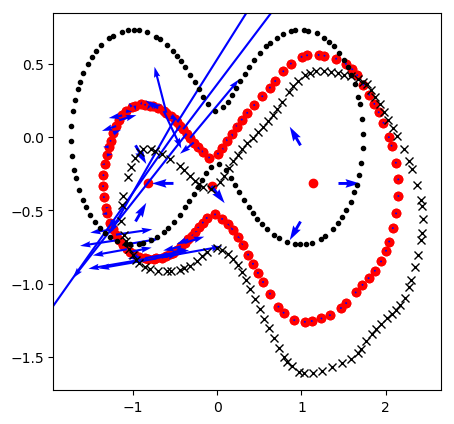

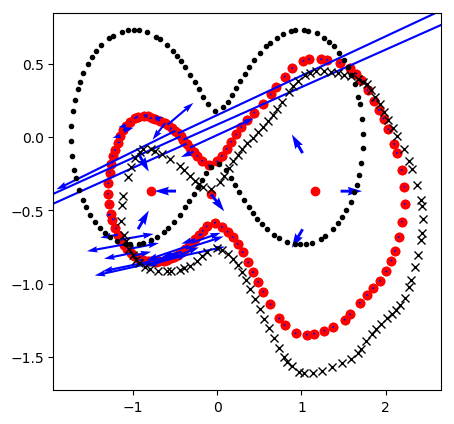

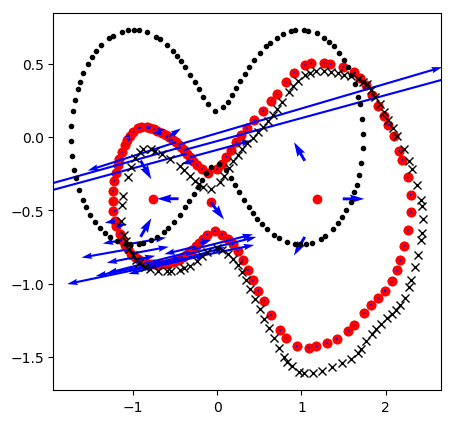

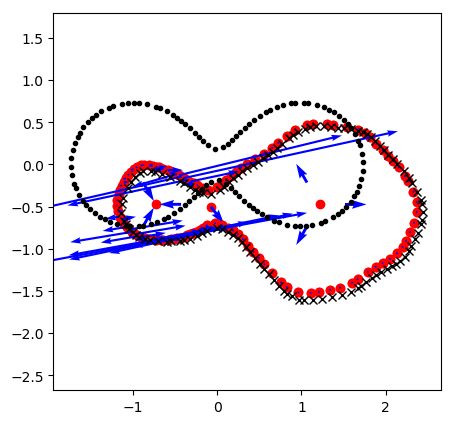

[<Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>,
 <Figure size 500x500 with 1 Axes>]

In [14]:
save.fig_states(show=True, plot_controls=True)

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ = torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), self.__coeff * K_q)


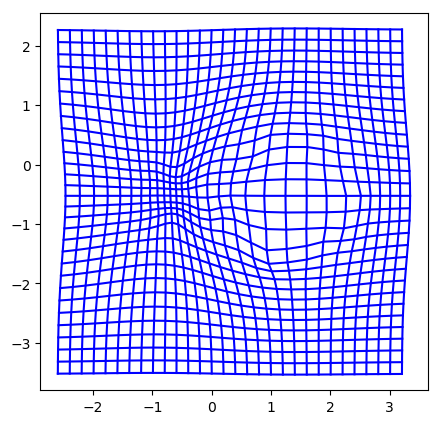

/home/kowalewski/anaconda3/envs/py35env/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AttributeError: Can't pickle local object 'ConstrainedTranslations_Scaling.__init__.<locals>.vector_generator'

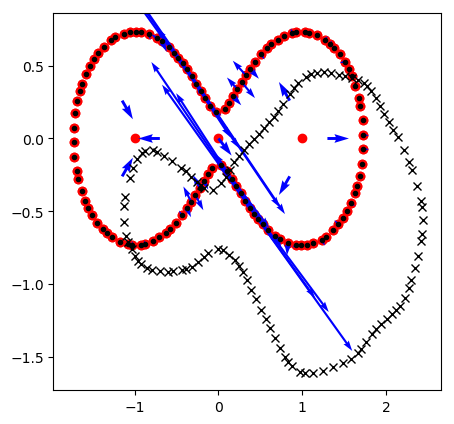

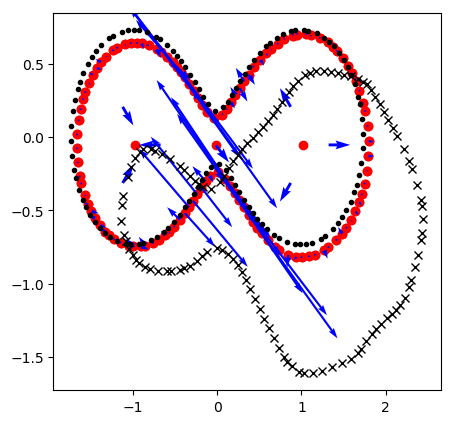

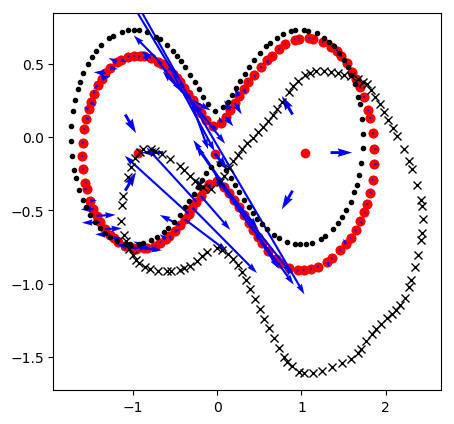

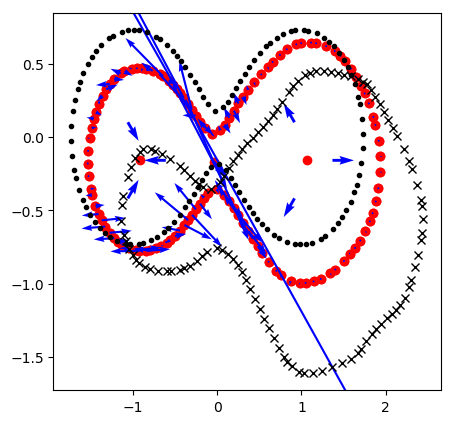

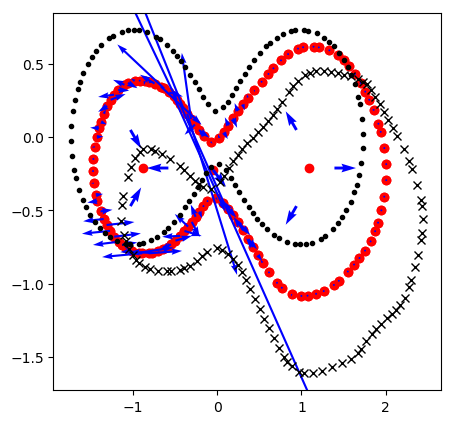

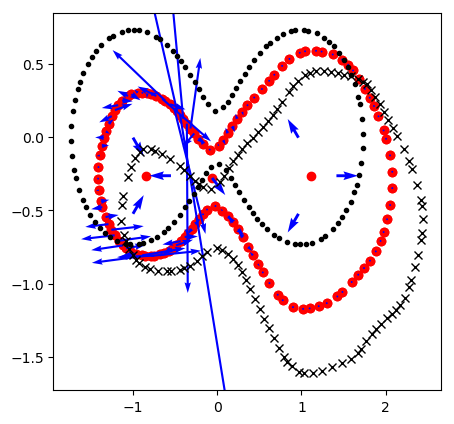

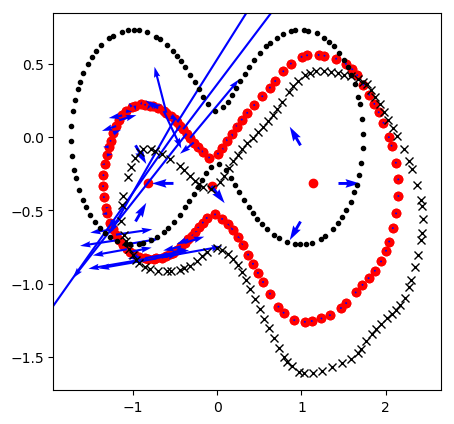

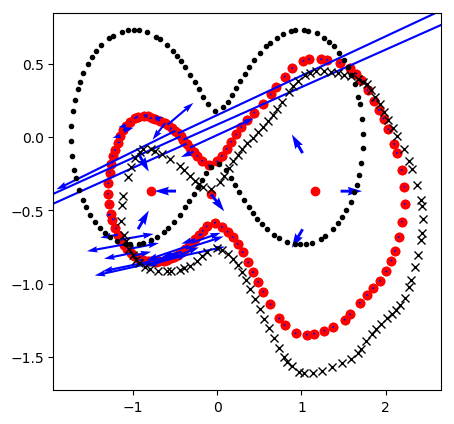

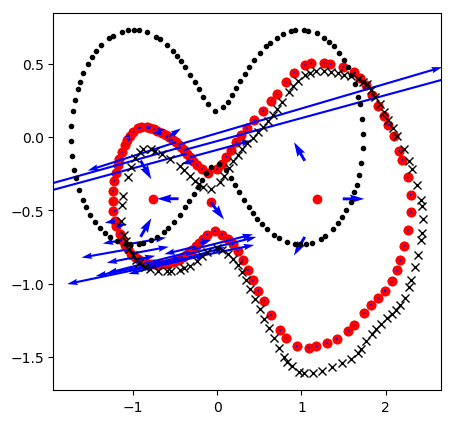

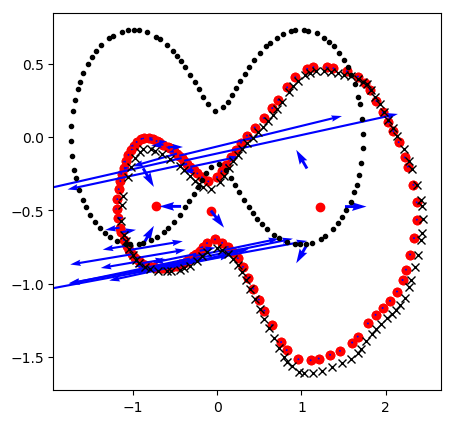

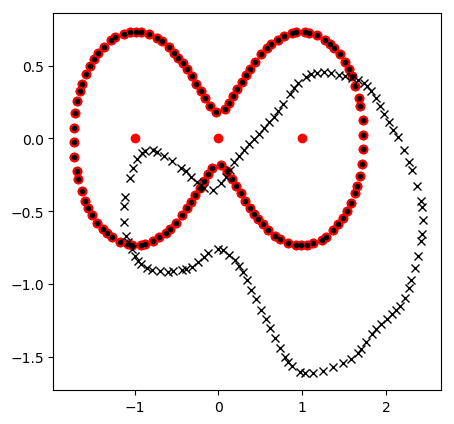

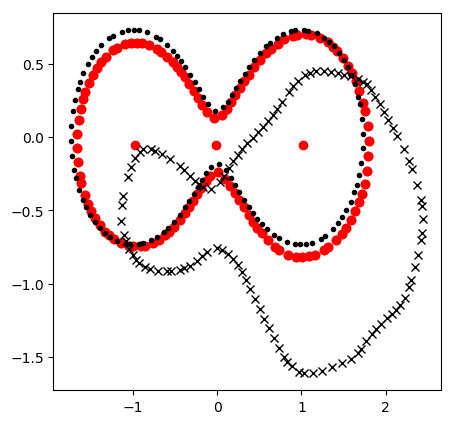

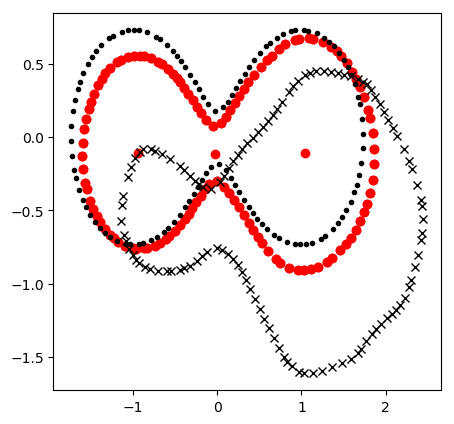

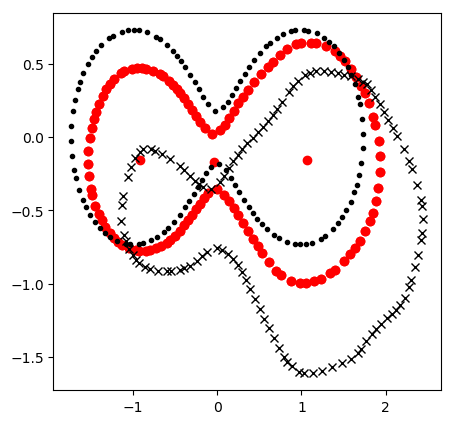

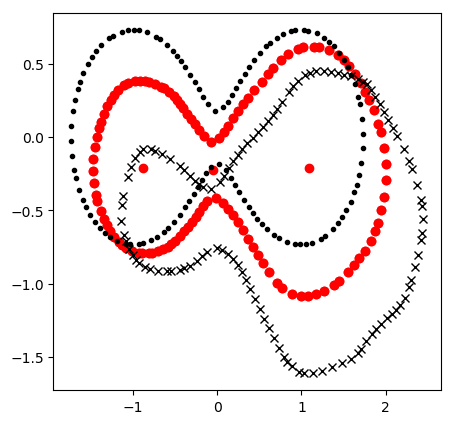

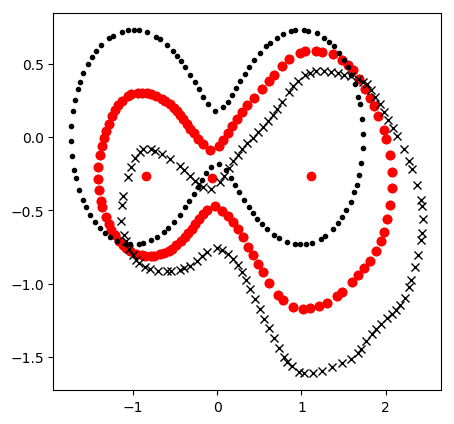

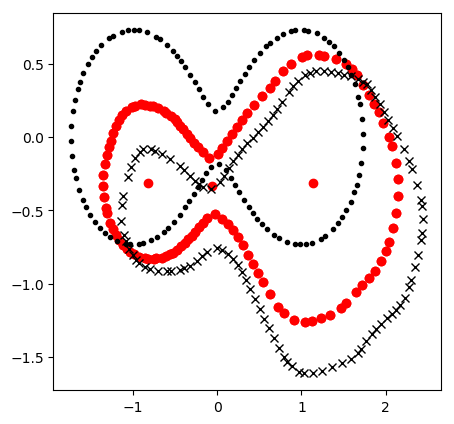

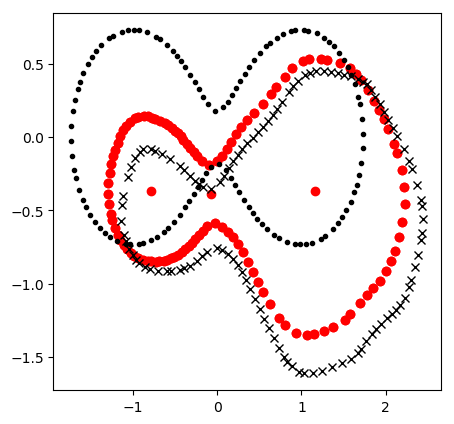

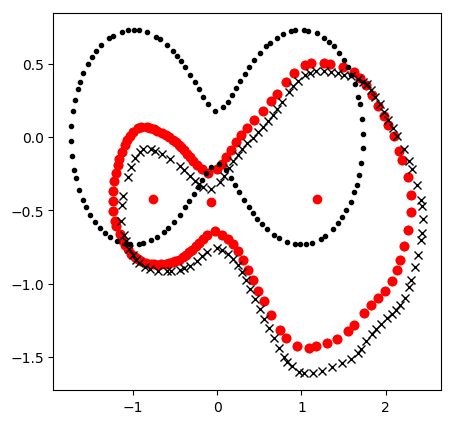

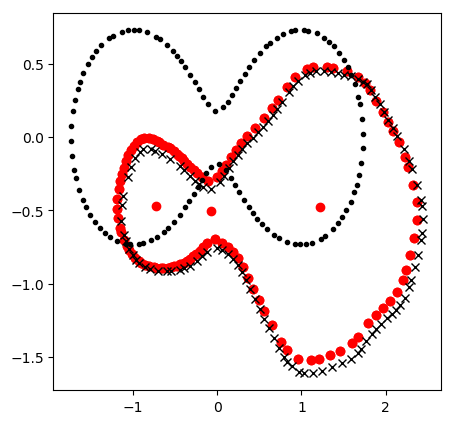

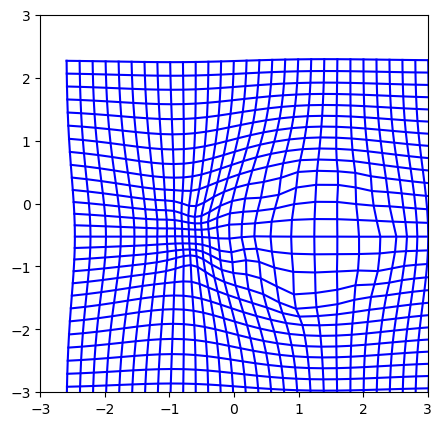

In [19]:
xlim = [-3, 3]
ylim = [-3,3]
d = [0.2, 0.2]
_ = save.gridpoints(xlim, ylim, d)

#fig_states = save.fig_states(show=True)
fig_grid = save.fig_grid(True)

save.save('../results/Nut/Defmod/')
plt.close('all')

In [ ]:
## LDDMM Module

man = dm.manifold.Landmarks(2, len(source[0]), gd = source[0].view(-1))
man_landmarks = dm.manifold.Landmarks(2, 3, gd = torch.tensor([[-1.,0.],[0.,0.], [1.,0.]], requires_grad=True).view(-1))
silent_landmarks = dm.deformationmodules.SilentPoints(man_landmarks)
module_LDDMM = dm.deformationmodules.CompoundModule([dm.deformationmodules.Translations(man, sigma=0.2), silent_landmarks])
H_LDDMM = dm.hamiltonian.Hamiltonian([module_LDDMM])

reg_param = 1e-3
Energy_LDDMM = EnergyFunctional_unconstrained(module_LDDMM, H_LDDMM, source, target, dim=2, gamma=reg_param, attach=attach)
gd0 = torch.cat(module_LDDMM.manifold.unroll_gd())
mom0 = torch.cat(module_LDDMM.manifold.unroll_cotan())
X_LDDMM = [gd0, mom0]

X_LDDMM[1] = dm.optimize.BFGS(Energy_LDDMM, X_LDDMM, disp=True)(maxiter=100)

In [ ]:
H_LDDMM.module.manifold.fill_gd(X_LDDMM[0])
H_LDDMM.module.manifold.fill_cotan(X_LDDMM[1])
H_LDDMM.geodesic_controls()
save = results.Save_Results_SingleShape(H_LDDMM, source, target)

xlim = [-3, 3]
ylim = [-2,2]
d = [0.05, 0.05]
_ = save.gridpoints(xlim, ylim, d)
#save.fig_grid(True)

#save.save('../results/Nut/LDDMM/')
#plt.close('all')

In [ ]:
save.fig_states(True)

In [ ]:
save.fig_grid(True)

In [20]:
sigma_bg = 0.000005
modules = dm.multishape.MultiShapeModule(data.modules, sigma_bg)
constr_Id = dm.constraints.Identity_Silent()
h = hamiltonian.Hamiltonian_multi(modules, constr_Id)

reg_param = 1e-3
def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules[0][0].manifold.gd.view(-1,2)], target)
E = EnergyFunctional_unconstrained(h.module, h, source, target, dim=2, gamma=reg_param, attach=attach)

In [21]:
gd0_tensor = torch.cat(h.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(h.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

X[1] = optimize.BFGS(E, X, disp=True)(maxiter=10, gtol=1e-5, eps=1e-8)

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ = torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), self.__coeff * K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 1.3359579494526131e-05 attach: 11.038901011354062
cost: 1.3359579494526131e-05 attach: 11.038901011354062
cost: 0.0001006732425544993 attach: 5.21573828956694e+47
cost: 0.0001006732425544993 attach: 5.21573828956694e+47
cost: 2.8710300650192765e-05 attach: 1.372691062121204e+21
cost: 2.8710300650192765e-05 attach: 1.372691062121204e+21
cost: 1.3359579494526131e-05 attach: 11.038901011354062
cost: 1.3359579494526131e-05 attach: 11.038901011354062
cost: 1.3359579494526131e-05 attach: 11.038901011354062
cost: 1.3359579494526131e-05 attach: 11.038901011354062


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ = torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), self.__coeff * K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 0.0001006732425544993 attach: 5.21573828956694e+47
cost: 4.1543348730438066e-05 attach: 6.211596846360388e+59
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
cost: 2.3583198538963465e-05 attach: 10.687811851903758
         Current function value: 11.038914
         Iterations: 0
         Function evaluations: 17
         Gradient evaluations: 6


In [ ]:
gd0_tensor = torch.cat(H.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(H.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[i].module_list[0].manifold.gd.view(-1,2) for i in range(len(target))], target)

E = EnergyFunctional(H.module, H, constr_Id, source, target, dim=2, gamma=1., attach=attach)

In [ ]:
X[1] = optimize.BFGS(E, X, disp=True)(maxiter=20)

In [ ]:
def test_gradcheck_Hamiltonian():
    def hamiltonian(gd, mom):
        
        h.module.manifold.fill_gd(gd)
        h.module.manifold.fill_cotan(mom)
        h.geodesic_controls()
        return h()
    
    return torch.autograd.gradcheck(hamiltonian, (gd, mom), raise_exception=True)

gd = torch.cat(h.module.manifold.unroll_gd().copy()).requires_grad_().view(-1)
mom = torch.cat(h.module.manifold.unroll_cotan().copy()).requires_grad_().view(-1)

h = h
test_gradcheck_Hamiltonian()